**Text File Conversion :** Compare the performance (time taken) of C, C++, Java, R, and Python programs for converting 200MB, 400 MB, 600 MB, 800 MB, and 1000MB text files to upper case.

200MB: 1.61s
400MB: 3.19s
600MB: 9.18s
800MB: 7.32s
1000MB: 17.99s


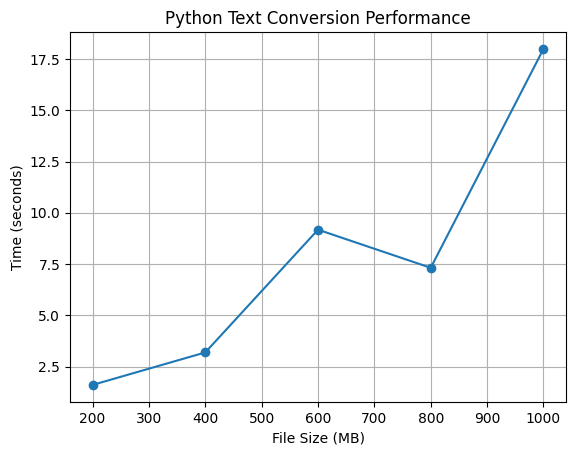

In [1]:
import time
import os
import random
import string
import matplotlib.pyplot as plt

def generate_file(filename, size_mb):
    with open(filename, 'w') as f:
        for _ in range(size_mb * 1024):
            f.write(''.join(random.choices(string.ascii_lowercase + ' ', k=1024)))

def convert_uppercase(input_file, output_file):
    start = time.time()
    with open(input_file, 'r') as f_in, open(output_file, 'w') as f_out:
        f_out.write(f_in.read().upper())
    return time.time() - start

sizes = [200, 400, 600, 800, 1000]
times = []

for size in sizes:
    input_file = f"input_{size}.txt"
    output_file = f"output_{size}.txt"

    generate_file(input_file, size)
    time_taken = convert_uppercase(input_file, output_file)
    times.append(time_taken)

    os.remove(input_file)
    os.remove(output_file)

    print(f"{size}MB: {time_taken:.2f}s")

plt.plot(sizes, times, 'o-')
plt.xlabel('File Size (MB)')
plt.ylabel('Time (seconds)')
plt.title('Python Text Conversion Performance')
plt.grid(True)
plt.show()